<a href="https://colab.research.google.com/github/seher13/PartialLeastSquares/blob/main/PLS_NIR_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLS NIR analysis

## Example from https://nirpyresearch.com/partial-least-squares-regression-python/

### Objection: Predict brix value of fresh peach from NIR spectra measurements. 

We have 50 NIR spectra of fresh peaches. Each spectrum is taken over 600 wavelenght points from 1100 nm to 2300 nm in steps of 2 nm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [3]:
pls = PLSRegression(n_components=5, scale=True)

In [4]:
from sys import stdout
from scipy.signal import savgol_filter

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/peach_spectra_brix.csv')
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,wl21,wl22,wl23,wl24,wl25,wl26,wl27,wl28,wl29,wl30,wl31,wl32,wl33,wl34,wl35,wl36,wl37,wl38,wl39,...,wl561,wl562,wl563,wl564,wl565,wl566,wl567,wl568,wl569,wl570,wl571,wl572,wl573,wl574,wl575,wl576,wl577,wl578,wl579,wl580,wl581,wl582,wl583,wl584,wl585,wl586,wl587,wl588,wl589,wl590,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.

In [6]:
data.shape

(50, 601)

In [7]:
y = data['Brix'].values

In [8]:
y

array([15.5, 16.7, 18.1, 14.8, 15.1, 19.3, 12.5, 17.7, 18.5, 18.3, 18.6,
       17.2, 19.4, 16.2, 15.3, 14.3, 13.3, 14.8, 18.5, 11.2, 16.3, 17.5,
       16.4, 18.1, 17.5, 16.7, 20. , 14.5, 13. , 11.3, 16.8, 17.2, 15.4,
       13.5, 19.2, 15.4, 15.8, 18. , 18.2, 12.3, 15.5, 14.8, 19.1, 17.9,
       16.8, 18.1, 16.6, 18.8, 17.7, 18.1])

In [9]:
X = data.drop(['Brix'], axis=1).values

In [10]:
wl = np.arange(1100, 2300, 2)

In [11]:
wl

array([1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120,
       1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164,
       1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186,
       1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208,
       1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298, 1300, 1302, 1304, 1306, 1308, 1310, 1312, 1314, 1316, 1318,
       1320, 1322, 1324, 1326, 1328, 1330, 1332, 1334, 1336, 1338, 1340,
       1342, 1344, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1360, 1362,
       1364, 1366, 1368, 1370, 1372, 1374, 1376, 1378, 1380, 1382, 1384,
       1386, 1388, 1390, 1392, 1394, 1396, 1398, 14

In [12]:
df = pd.DataFrame(wl)

In [13]:
df.loc[-1] = ['Brix']
df.index = df.index +1
df= df.sort_index()

In [14]:
df

,0
0,Brix
1,1100
2,1102
3,1104
4,1106
...,...
596,2290
597,2292
598,2294
599,2296


In [15]:
column_names = df.values

In [16]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,wl10,wl11,wl12,wl13,wl14,wl15,wl16,wl17,wl18,wl19,wl20,wl21,wl22,wl23,wl24,wl25,wl26,wl27,wl28,wl29,wl30,wl31,wl32,wl33,wl34,wl35,wl36,wl37,wl38,wl39,...,wl561,wl562,wl563,wl564,wl565,wl566,wl567,wl568,wl569,wl570,wl571,wl572,wl573,wl574,wl575,wl576,wl577,wl578,wl579,wl580,wl581,wl582,wl583,wl584,wl585,wl586,wl587,wl588,wl589,wl590,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.

In [ ]:
wl

array([1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120,
       1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164,
       1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186,
       1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208,
       1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298, 1300, 1302, 1304, 1306, 1308, 1310, 1312, 1314, 1316, 1318,
       1320, 1322, 1324, 1326, 1328, 1330, 1332, 1334, 1336, 1338, 1340,
       1342, 1344, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1360, 1362,
       1364, 1366, 1368, 1370, 1372, 1374, 1376, 1378, 1380, 1382, 1384,
       1386, 1388, 1390, 1392, 1394, 1396, 1398, 14

In [ ]:
X2 = pd.DataFrame(X)

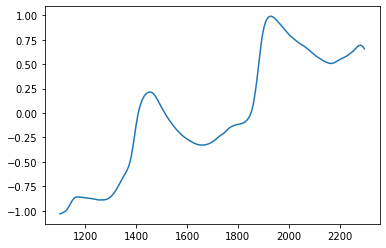

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.plot(wl, X2.iloc[0,:])

In [ ]:
X

array([[-1.03235522, -1.03055086, -1.02796982, ...,  0.67323981,
         0.66592221,  0.65730671],
       [-1.13903374, -1.13718559, -1.13448514, ...,  0.69371003,
         0.6834796 ,  0.67195954],
       [-1.15282145, -1.15093731, -1.14828792, ...,  0.7005548 ,
         0.69014711,  0.67839039],
       ...,
       [-1.07507228, -1.07321983, -1.07053089, ...,  0.68964632,
         0.68117942,  0.6714216 ],
       [-1.13547094, -1.13363607, -1.13100228, ...,  0.70733553,
         0.69798395,  0.68729054],
       [-1.03606157, -1.03425973, -1.03167827, ...,  0.66929315,
         0.66099829,  0.65157825]])

In [ ]:
X2.iloc[:,0]

0    -1.032355
1    -1.139034
2    -1.152821
3    -1.087215
4    -1.080364
5    -0.981329
6    -1.116596
7    -1.161027
8    -1.167002
9    -1.135624
10   -1.037029
11   -0.932467
12   -1.058743
13   -1.015973
14   -1.114346
15   -1.126309
16   -1.214996
17   -1.031265
18   -0.973741
19   -1.069199
20   -1.064018
21   -1.070859
22   -1.003094
23   -0.996235
24   -0.994628
25   -0.991444
26   -0.963085
27   -0.978270
28   -0.954397
29   -0.833572
30   -1.004240
31   -0.972120
32   -0.997730
33   -0.991166
34   -0.863299
35   -0.891666
36   -1.075860
37   -1.117406
38   -1.009840
39   -1.073756
40   -1.016599
41   -1.169151
42   -1.142776
43   -1.047168
44   -1.132140
45   -1.133235
46   -1.074949
47   -1.075072
48   -1.135471
49   -1.036062
Name: 0, dtype: float64

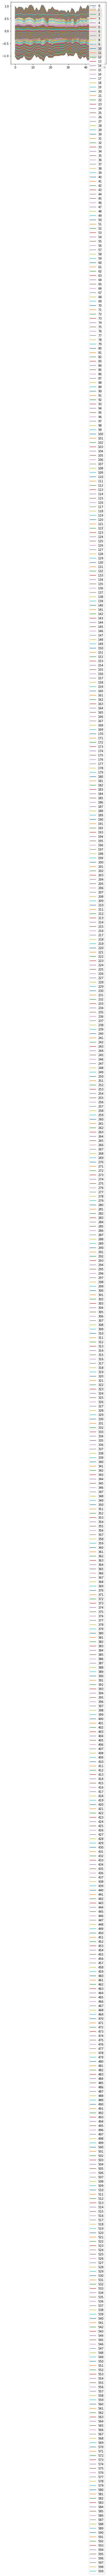

In [ ]:
X2.plot()

In [ ]:
data.columns

Index(['Brix', 'wl1', 'wl2', 'wl3', 'wl4', 'wl5', 'wl6', 'wl7', 'wl8', 'wl9',
       ...
       'wl591', 'wl592', 'wl593', 'wl594', 'wl595', 'wl596', 'wl597', 'wl598',
       'wl599', 'wl600'],
      dtype='object', length=601)

In [ ]:
column_names = column_names.flatten()

In [ ]:
data.columns = column_names

In [ ]:
data.head()

,Brix,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,...,2220,2222,2224,2226,2228,2230,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250,2252,2254,2256,2258,2260,2262,2264,2266,2268,2270,2272,2274,2276,2278,2280,2282,2284,2286,2288,2290,2292,2294,2296,2298
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.653425,0.657747,0.662194,0.6667

In [ ]:
data

,Brix,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,...,2220,2222,2224,2226,2228,2230,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250,2252,2254,2256,2258,2260,2262,2264,2266,2268,2270,2272,2274,2276,2278,2280,2282,2284,2286,2288,2290,2292,2294,2296,2298
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,-1.010532,-1.007463,-1.003553,-0.998692,-0.992881,-0.986095,-0.978415,-0.969977,-0.960966,-0.951527,-0.941862,-0.932116,-0.922483,-0.913120,-0.904231,-0.895957,-0.888438,-0.881760,-0.875966,-0.871050,-0.867026,-0.863836,-0.861448,-0.859782,-0.858781,-0.858344,-0.858336,-0.858627,-0.859111,-0.859663,...,0.570536,0.573319,0.576187,0.579233,0.582458,0.585902,0.589522,0.593307,0.597123,0.601006,0.604889,0.608810,0.612722,0.616726,0.620768,0.625012,0.629424,0.634161,0.639214,0.644596,0.650150,0.655833,0.661478,0.667032,0.672286,0.677200,0.681637,0.685523,0.688670,0.690998,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,-1.112693,-1.108582,-1.103445,-1.097091,-1.089464,-1.080559,-1.070487,-1.059381,-1.047464,-1.034995,-1.022211,-1.009349,-0.996648,-0.984325,-0.972636,-0.961745,-0.951804,-0.942939,-0.935200,-0.928595,-0.923099,-0.918668,-0.915216,-0.912633,-0.910808,-0.909609,-0.908897,-0.908530,-0.908384,-0.908363,...,0.621430,0.624266,0.627355,0.630658,0.634201,0.637892,0.641714,0.645603,0.649560,0.653566,0.657693,0.661891,0.666164,0.670433,0.674673,0.678845,0.683017,0.687180,0.691465,0.695882,0.700498,0.705217,0.709870,0.714365,0.718474,0.722032,0.725000,0.727293,0.728864,0.729577,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,-1.128545,-1.124812,-1.120119,-1.114300,-1.107314,-1.099163,-1.089929,-1.079725,-1.068794,-1.057343,-1.045592,-1.033741,-1.022040,-1.010663,-0.999841,-0.989750,-0.980576,-0.972405,-0.965307,-0.959307,-0.954360,-0.950380,-0.947314,-0.945039,-0.943487,-0.942518,-0.942020,-0.941865,-0.941918,-0.942075,...,0.625107,0.628053,0.631187,0.634506,0.637995,0.641662,0.645448,0.649371,0.653379,0.657395,0.661493,0.665571,0.669666,0.673861,0.678142,0.682562,0.687126,0.691777,0.696577,0.701409,0.706370,0.711384,0.716337,0.721078,0.725488,0.729322,0.732476,0.734823,0.736351,0.736962,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,-1.064022,-1.060653,-1.056394,-1.051085,-1.044722,-1.037282,-1.028872,-1.019618,-1.009693,-0.999275,-0.988603,-0.977836,-0.967192,-0.956830,-0.946988,-0.937805,-0.929429,-0.921967,-0.915491,-0.909978,-0.905445,-0.901829,-0.899085,-0.897117,-0.895846,-0.895156,-0.894883,-0.894888,-0.895062,-0.895296,...,0.616723,0.620338,0.624184,0.628275,0.632593,0.637170,0.642033,0.647142,0.652463,0.657956,0.663565,0.669189,0.674820,0.680431,0.686066,0.691665,0.697316,0.702983,0.708750,0.714584,0.720497,0.726412,0.732218,0.737746,0.742900,0.747477,0.751378,0.754542,0.756884,0.758295,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,-1.057139,-1.053769,-1.049486,-1.044162,-1.037763,-1.030273,-1.021803,-1.012474,-1.002463,-0.991968,-0.981208,-0.970383,-0.959684,-0.949295,-0.939437,-0.930237,-0.921855,-0.914376,-0.907865,-0.902323,-0.897748,-0.894093,-0.891306,-0.889307,-0.888014,-0.887297,-0.887022,-0.887034,-0.887245,-0.887545,...,0.603742,0.606837,0.610083,0.613500,0.617068,0.620793,0.624679,0.628648,0.632668,0.636751,0.640849,0.644985,0.649169,0.653425,0.657747,0.662194,0.6667

In [ ]:
data_trans = data.transpose()

In [ ]:
data_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Brix,15.500000,16.700000,18.100000,14.800000,15.100000,19.300000,12.500000,17.700000,18.500000,18.300000,18.600000,17.200000,19.400000,16.200000,15.300000,14.300000,13.300000,14.800000,18.500000,11.200000,16.300000,17.500000,16.400000,18.100000,17.500000,16.700000,20.000000,14.500000,13.000000,11.300000,16.800000,17.200000,15.400000,13.500000,19.200000,15.400000,15.800000,18.000000,18.200000,12.300000,15.500000,14.800000,19.100000,17.900000,16.800000,18.100000,16.600000,18.800000,17.700000,18.100000
1100,-1.032355,-1.139034,-1.152821,-1.087215,-1.080364,-0.981329,-1.116596,-1.161027,-1.167002,-1.135624,-1.037029,-0.932467,-1.058743,-1.015973,-1.114346,-1.126309,-1.214996,-1.031265,-0.973741,-1.069199,-1.064018,-1.070859,-1.003094,-0.996235,-0.994628,-0.991444,-0.963085,-0.978270,-0.954397,-0.833572,-1.004240,-0.972120,-0.997730,-0.991166,-0.863299,-0.891666,-1.075860,-1.117406,-1.009840,-1.073756,-1.016599,-1.169151,-1.142776,-1.047168,-1.132140,-1.133235,-1.074949,-1.075072,-1.135471,-1.036062
1102,-1.030551,-1.137186,-1.150937,-1.085455,-1.078436,-0.979609,-1.114783,-1.159104,-1.165128,-1.133766,-1.035263,-0.930752,-1.056923,-1.014087,-1.112413,-1.124433,-1.213145,-1.029444,-0.971831,-1.067305,-1.062103,-1.069032,-1.001246,-0.994376,-0.992769,-0.989577,-0.961279,-0.976371,-0.952596,-0.831776,-1.002456,-0.970256,-0.995873,-0.989340,-0.861532,-0.889867,-1.073923,-1.115602,-1.008042,-1.071898,-1.014749,-1.167316,-1.140995,-1.045390,-1.130190,-1.131388,-1.073077,-1.073220,-1.133636,-1.034260
1104,-1.027970,-1.134485,-1.148288,-1.082867,-1.075784,-0.977085,-1.112159,-1.156357,-1.162439,-1.131093,-1.032739,-0.928294,-1.054333,-1.011490,-1.109615,-1.121790,-1.210363,-1.026830,-0.969083,-1.064578,-1.059360,-1.066469,-0.998600,-0.991728,-0.990117,-0.986945,-0.958734,-0.973747,-0.949968,-0.829267,-0.999976,-0.967536,-0.993279,-0.986710,-0.859047,-0.887298,-1.071172,-1.113034,-1.005537,-1.069220,-1.012057,-1.164623,-1.138415,-1.042812,-1.127475,-1.128708,-1.070434,-1.070531,-1.131002,-1.031678
1106,-1.024937,-1.131222,-1.145165,-1.079797,-1.072693,-0.974006,-1.108967,-1.153022,-1.159234,-1.127927,-1.029744,-0.925379,-1.051283,-1.008474,-1.106212,-1.118624,-1.206912,-1.023717,-0.965724,-1.061270,-1.056005,-1.063489,-0.995521,-0.988599,-0.986991,-0.983845,-0.955717,-0.970635,-0.946798,-0.826347,-0.997076,-0.964252,-0.990266,-0.983572,-0.856145,-0.884286,-1.067877,-1.109951,-1.002623,-1.066053,-1.008933,-1.161388,-1.135291,-1.039722,-1.124280,-1.125488,-1.067305,-1.067333,-1.127933,-1.028609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,0.684294,0.710405,0.717415,0.742886,0.704232,0.683037,0.698013,0.709406,0.723164,0.706479,0.698866,0.676718,0.706208,0.719505,0.704270,0.706605,0.723160,0.714793,0.671482,0.714089,0.697320,0.707340,0.693294,0.689684,0.697344,0.690753,0.688795,0.685719,0.669437,0.649538,0.731076,0.669804,0.699380,0.691395,0.673780,0.660988,0.675457,0.715732,0.715786,0.701809,0.686561,0.773737,0.727635,0.677888,0.709077,0.729688,0.692695,0.702870,0.722074,0.682452
2292,0.679348,0.702706,0.709645,0.736085,0.697717,0.676574,0.691105,0.701723,0.715477,0.699453,0.693753,0.671350,0.700296,0.713695,0.695746,0.698599,0.713609,0.707306,0.665890,0.706369,0.690276,0.700345,0.686818,0.683380,0.691421,0.684479,0.683317,0.679971,0.664321,0.645104,0.724326,0.664191,0.693837,0.685602,0.669314,0.656738,0.668703,0.708863,0.709574,0.695142,0.679962,0.765342,0.720245,0.671955,0.702017,0.722603,0.685385,0.696847,0.715366,0.676434
2294,0.673240,0.693710,0.700555,0.728019,0.689882,0.669187,0.682972,0.692694,0.706339,0.691065,0.687409,0.664925,0.693080,0.706819,0.686072,0.689218,0.702624,0.698597,0.659325,0.697367,0.682064,0.692018,0.679236,0.675989

In [ ]:
data_trans_wl = data_trans.iloc[1:,:]

In [ ]:
data_trans_wl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1100,-1.032355,-1.139034,-1.152821,-1.087215,-1.080364,-0.981329,-1.116596,-1.161027,-1.167002,-1.135624,-1.037029,-0.932467,-1.058743,-1.015973,-1.114346,-1.126309,-1.214996,-1.031265,-0.973741,-1.069199,-1.064018,-1.070859,-1.003094,-0.996235,-0.994628,-0.991444,-0.963085,-0.978270,-0.954397,-0.833572,-1.004240,-0.972120,-0.997730,-0.991166,-0.863299,-0.891666,-1.075860,-1.117406,-1.009840,-1.073756,-1.016599,-1.169151,-1.142776,-1.047168,-1.132140,-1.133235,-1.074949,-1.075072,-1.135471,-1.036062
1102,-1.030551,-1.137186,-1.150937,-1.085455,-1.078436,-0.979609,-1.114783,-1.159104,-1.165128,-1.133766,-1.035263,-0.930752,-1.056923,-1.014087,-1.112413,-1.124433,-1.213145,-1.029444,-0.971831,-1.067305,-1.062103,-1.069032,-1.001246,-0.994376,-0.992769,-0.989577,-0.961279,-0.976371,-0.952596,-0.831776,-1.002456,-0.970256,-0.995873,-0.989340,-0.861532,-0.889867,-1.073923,-1.115602,-1.008042,-1.071898,-1.014749,-1.167316,-1.140995,-1.045390,-1.130190,-1.131388,-1.073077,-1.073220,-1.133636,-1.034260
1104,-1.027970,-1.134485,-1.148288,-1.082867,-1.075784,-0.977085,-1.112159,-1.156357,-1.162439,-1.131093,-1.032739,-0.928294,-1.054333,-1.011490,-1.109615,-1.121790,-1.210363,-1.026830,-0.969083,-1.064578,-1.059360,-1.066469,-0.998600,-0.991728,-0.990117,-0.986945,-0.958734,-0.973747,-0.949968,-0.829267,-0.999976,-0.967536,-0.993279,-0.986710,-0.859047,-0.887298,-1.071172,-1.113034,-1.005537,-1.069220,-1.012057,-1.164623,-1.138415,-1.042812,-1.127475,-1.128708,-1.070434,-1.070531,-1.131002,-1.031678
1106,-1.024937,-1.131222,-1.145165,-1.079797,-1.072693,-0.974006,-1.108967,-1.153022,-1.159234,-1.127927,-1.029744,-0.925379,-1.051283,-1.008474,-1.106212,-1.118624,-1.206912,-1.023717,-0.965724,-1.061270,-1.056005,-1.063489,-0.995521,-0.988599,-0.986991,-0.983845,-0.955717,-0.970635,-0.946798,-0.826347,-0.997076,-0.964252,-0.990266,-0.983572,-0.856145,-0.884286,-1.067877,-1.109951,-1.002623,-1.066053,-1.008933,-1.161388,-1.135291,-1.039722,-1.124280,-1.125488,-1.067305,-1.067333,-1.127933,-1.028609
1108,-1.021866,-1.127761,-1.141951,-1.076568,-1.069562,-0.970839,-1.105666,-1.149477,-1.155926,-1.124654,-1.026651,-0.922428,-1.048145,-1.005437,-1.102566,-1.115307,-1.203175,-1.020483,-0.962132,-1.057782,-1.052526,-1.060480,-0.992457,-0.985456,-0.983816,-0.980723,-0.952610,-0.967442,-0.943490,-0.823415,-0.994127,-0.960823,-0.987205,-0.980368,-0.853196,-0.881261,-1.064431,-1.106734,-0.999704,-1.062779,-1.005749,-1.158037,-1.132032,-1.036510,-1.121035,-1.122157,-1.064059,-1.064043,-1.124770,-1.025445


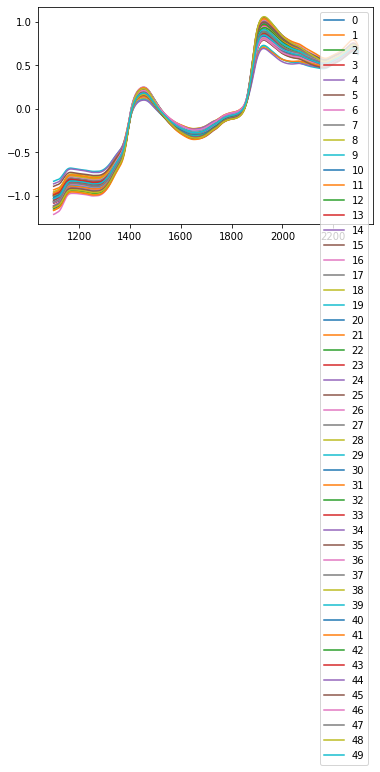

In [ ]:
data_trans_wl.plot()

In [ ]:
X2 = savgol_filter(X,17, polyorder=2, deriv=2)

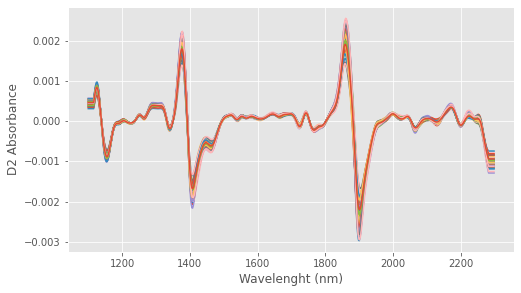

In [ ]:
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
  plt.plot(wl, X2.T)
  plt.xlabel('Wavelenght (nm)')
  plt.ylabel('D2 Absorbance')
  plt.show()

In [ ]:
test = pd.DataFrame(X2.T)

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.000357,0.000515,0.000467,0.000404,0.000409,0.000362,0.000461,0.000536,0.000457,0.000448,0.000397,0.000337,0.000398,0.000423,0.000551,0.000451,0.000569,0.000441,0.000544,0.000477,0.000490,0.000388,0.000392,0.000402,0.000387,0.000398,0.000373,0.000403,0.000416,0.000309,0.000382,0.000485,0.000379,0.000384,0.000362,0.000343,0.000553,0.000454,0.000363,0.000472,0.000390,0.000474,0.000472,0.000462,0.000471,0.000489,0.000472,0.000483,0.000449,0.000461
1,0.000357,0.000515,0.000467,0.000404,0.000409,0.000362,0.000461,0.000536,0.000457,0.000448,0.000397,0.000337,0.000398,0.000423,0.000551,0.000451,0.000569,0.000441,0.000544,0.000477,0.000490,0.000388,0.000392,0.000402,0.000387,0.000398,0.000373,0.000403,0.000416,0.000309,0.000382,0.000485,0.000379,0.000384,0.000362,0.000343,0.000553,0.000454,0.000363,0.000472,0.000390,0.000474,0.000472,0.000462,0.000471,0.000489,0.000472,0.000483,0.000449,0.000461
2,0.000357,0.000515,0.000467,0.000404,0.000409,0.000362,0.000461,0.000536,0.000457,0.000448,0.000397,0.000337,0.000398,0.000423,0.000551,0.000451,0.000569,0.000441,0.000544,0.000477,0.000490,0.000388,0.000392,0.000402,0.000387,0.000398,0.000373,0.000403,0.000416,0.000309,0.000382,0.000485,0.000379,0.000384,0.000362,0.000343,0.000553,0.000454,0.000363,0.000472,0.000390,0.000474,0.000472,0.000462,0.000471,0.000489,0.000472,0.000483,0.000449,0.000461
3,0.000357,0.000515,0.000467,0.000404,0.000409,0.000362,0.000461,0.000536,0.000457,0.000448,0.000397,0.000337,0.000398,0.000423,0.000551,0.000451,0.000569,0.000441,0.000544,0.000477,0.000490,0.000388,0.000392,0.000402,0.000387,0.000398,0.000373,0.000403,0.000416,0.000309,0.000382,0.000485,0.000379,0.000384,0.000362,0.000343,0.000553,0.000454,0.000363,0.000472,0.000390,0.000474,0.000472,0.000462,0.000471,0.000489,0.000472,0.000483,0.000449,0.000461
4,0.000357,0.000515,0.000467,0.000404,0.000409,0.000362,0.000461,0.000536,0.000457,0.000448,0.000397,0.000337,0.000398,0.000423,0.000551,0.000451,0.000569,0.000441,0.000544,0.000477,0.000490,0.000388,0.000392,0.000402,0.000387,0.000398,0.000373,0.000403,0.000416,0.000309,0.000382,0.000485,0.000379,0.000384,0.000362,0.000343,0.000553,0.000454,0.000363,0.000472,0.000390,0.000474,0.000472,0.000462,0.000471,0.000489,0.000472,0.000483,0.000449,0.000461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.000963,-0.001091,-0.001111,-0.001101,-0.001036,-0.000928,-0.001049,-0.001103,-0.001172,-0.001103,-0.000968,-0.000887,-0.001012,-0.000966,-0.001134,-0.001188,-0.001289,-0.001040,-0.000847,-0.001093,-0.001034,-0.001097,-0.001004,-0.000963,-0.000962,-0.000955,-0.000917,-0.000914,-0.000848,-0.000744,-0.001028,-0.000836,-0.000963,-0.000946,-0.000790,-0.000812,-0.000983,-0.001105,-0.001019,-0.001030,-0.000968,-0.001254,-0.001128,-0.000955,-0.001114,-0.001134,-0.001024,-0.000978,-0.001123,-0.000940
596,-0.000963,-0.001091,-0.001111,-0.001101,-0.001036,-0.000928,-0.001049,-0.001103,-0.001172,-0.001103,-0.000968,-0.000887,-0.001012,-0.000966,-0.001134,-0.001188,-0.001289,-0.001040,-0.000847,-0.001093,-0.001034,-0.001097,-0.001004,-0.000963,-0.000962,-0.000955,-0.000917,-0.000914,-0.000848,-0.000744,-0.001028,-0.000836,-0.000963,-0.000946,-0.000790,-0.000812,-0.000983,-0.001105,-0.001019,-0.001030,-0.000968,-0.001254,-0.001128,-0.000955,-0.001114,-0.001134,-0.001024,-0.000978,-0.001123,-0.000940
597,-0.000963,-0.001091,-0.001111,-0.001101,-0.001036,-0.000928,-0.001049,-0.001103,-0.001172,-0.001103,-0.000968,-0.000887,-0.001012,-0.000966,-0.001134,-0.001188,-0.001289,-0.001040,-0.000847,-0.001093,-0.001034,-0.001097,-0.001004,-0.000963,-0.000962,-0.000955,-0.000917,-0.000914,-0.000848,-0.000744,-0.001028,-0.000836,-0.000963,-0.000946,-0.000790,-0.000812,-0.000983,-0.001105,-0.

In [ ]:
def optimise_pls_csv(X, y, n_comp, plot_components=True):

#Run PLS including a cariable number of components and calculate MSE

  mse = []
  component = np.arange(1,n_comp)

  for i in component:
    pls = PLSRegression(n_components=i)

    #cross validation
    y_cv = cross_val_predict(pls, X, y, cv=10)
    mse.append(mean_squared_error(y,y_cv))

    
    comp = 100*(i+1)/40
    #Trick to update status on the same lline
    stdout.write('\r%d%% completed' % comp)
    stdout.flush()
  stdout.write('\n')  

  #Calculate and print the position of minimum in MSE
  msemin = np.argmin(mse)
  print('Suggested number of components: ', msemin+1)
  stdout.write('\n')  

  if plot_components is True:
    with plt.style.context(('ggplot')):
      plt.plot(component, np.array(mse), 'v', color='blue', mfc='blue')
      plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=15, mfc='red')
      plt.xlabel('Number of components')
      plt.ylabel('MSE')
      plt.title('PLS')
      plt.xlim(left=1)
    
    plt.show()

  #Define PLS object with optimal number of components
  pls_opt = PLSRegression(n_components=msemin+1)

  #Fit to the entire dataset
  pls_opt.fit(X, y)
  y_c = pls_opt.predict(X)

  #Cross_validation
  y_cv = cross_val_predict(pls_opt, X, y, cv=10)

  #Calculate scores for calibration and cross valiation
  score_c = r2_score(y, y_c)
  score_cv = r2_score(y, y_cv)

  #Calculate mean squared error for calibration and cross validation
  mse_c = mean_squared_error(y, y_c)
  mse_cv = mean_squared_error(y, y_cv)

  print('R2 calib: %5.3f' % score_c)
  print('R2 CV: %5.3f' % score_cv)
  print('MSE calib: %5.3f' % mse_c)
  print('MSE CV: %5.3f' % mse_cv)

  # Plot regression and figures of merit

  rangey = max(y) - min(y)
  rangex = max(y_c) - min(y_c)

  #Fit a line to the CV vs response
  z = np.polyfit(y, y_c, 1)
  with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9,5))
    ax.scatter(y_c, y, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y), y,c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')

    plt.show()

  return



100% completed
Suggested number of components:  7



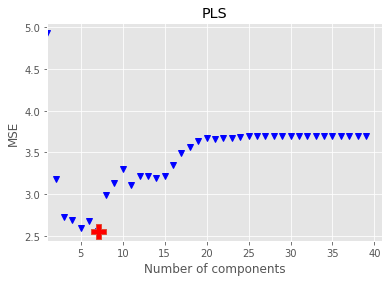

R2 calib: 0.859
R2 CV: 0.451
MSE calib: 0.657
MSE CV: 2.558


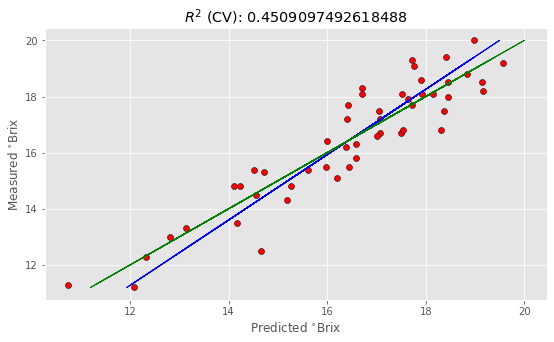

In [ ]:
optimise_pls_csv(X2,y,40, plot_components=True)

In [ ]:
pls = PLSRegression(n_components=3)

y_cv = cross_val_predict(pls, X2, y, cv=10)

In [ ]:
y_cv_df = pd.DataFrame(y_cv)

In [ ]:
y_df = pd.DataFrame(y)

In [ ]:
pd.concat([y_cv_df, y_df], axis=1)

,0,0
0,15.184518,15.5
1,17.148446,16.7
2,15.262455,18.1
3,16.040541,14.8
4,15.799896,15.1
5,14.099764,19.3
6,16.913268,12.5
7,16.341850,17.7
8,18.605868,18.5
9,16.974221,18.3


In [ ]:
dg = np.array([5,3,1,4,5])

In [ ]:
dg

array([5, 3, 1, 4, 5])

In [ ]:
np.argmin(dg)

2

In [ ]:
a = np.array([1,2,3,4])
b = np.array([0.5,1,1.5,2])

In [ ]:
np.polyfit(b,a,1)

array([ 2.00000000e+00, -1.06681717e-15])

In [ ]:
X1 = savgol_filter(X, 11, polyorder=2, deriv=1)
X2 = savgol_filter(X, 13, polyorder=2, deriv=2)

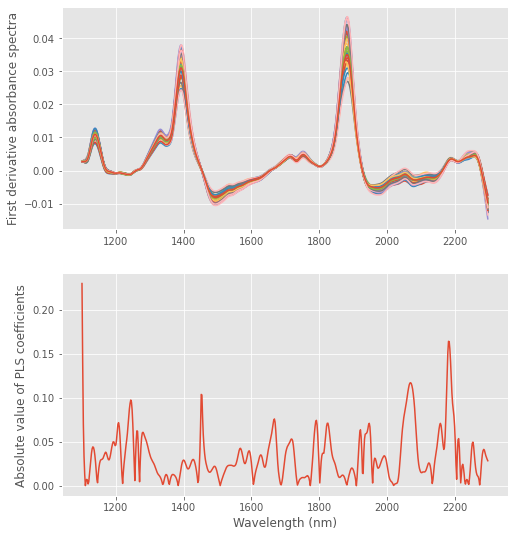

In [ ]:
#define the PLS regression object
pls = PLSRegression(n_components=8)
#Fit data
pls.fit(X1, y)

plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
  ax1 = plt.subplot(211)
  plt.plot(wl, X1.T)
  plt.ylabel('First derivative absorbance spectra')

  ax2 = plt.subplot(212, sharex=ax1)
  plt.plot(wl, np.abs(pls.coef_[:,0]))
  plt.xlabel('Wavelength (nm)')
  plt.ylabel('Absolute value of PLS coefficients')

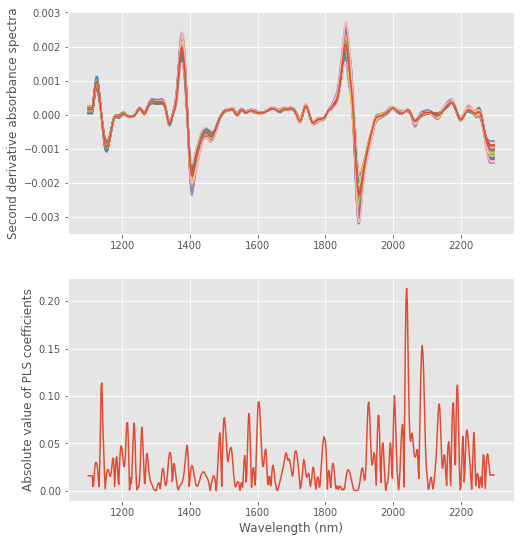

In [ ]:
#define the PLS regression object
pls2 = PLSRegression(n_components=8)
#Fit data
pls2.fit(X2, y)

plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
  ax1 = plt.subplot(211)
  plt.plot(wl, X2.T)
  plt.ylabel('Second derivative absorbance spectra')

  ax2 = plt.subplot(212, sharex=ax1)
  plt.plot(wl, np.abs(pls2.coef_[:,0]))
  plt.xlabel('Wavelength (nm)')
  plt.ylabel('Absolute value of PLS coefficients')

In [ ]:
#Get the list of indices that sorts the PLS coffecients in ascending order of the absolute value
sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
Xc = X1[:,sorted_ind]

In [ ]:
sorted_ind

array([405,   5, 204, 337, 142, 460, 318, 391, 294, 587, 461, 119, 129,
       571, 253, 293, 566, 459, 462,   9, 120, 463, 517, 390, 464,  60,
       319, 570, 465, 429, 351, 128, 205, 559, 203, 458,  23, 171, 141,
       295, 143,  10, 457, 466,  85, 392, 118, 336, 320, 456, 565, 254,
         6, 292, 567, 121, 389, 130, 206,  78, 172, 317, 569,   8, 404,
       455, 518, 321, 586, 202, 140, 338,  22, 568, 117,   7, 553, 127,
       322, 588, 454, 207, 393, 388, 296, 323, 467, 572, 335, 122, 139,
       131, 324, 116, 406, 328, 144, 325, 327, 329, 326, 380, 381, 252,
       585, 330, 379, 201, 387, 138, 331, 291, 208, 382, 115, 334, 403,
       126, 255, 170, 453, 584, 516, 332, 132, 383, 123, 137, 333, 386,
       394, 114,  59, 378, 384, 385, 136, 583, 125, 113, 133, 316, 209,
       135, 560, 124,  11, 134,   4,  24, 112, 200, 564, 415, 402, 414,
       145, 377, 297, 395, 210, 256,  61, 501, 111, 502, 468, 582, 519,
       188, 189, 452, 500, 352, 503, 506, 505, 504, 339, 190, 42

In [ ]:
Xcdf = X1df.iloc[:,sorted_ind]

In [ ]:
Xcdf

,405,5,204,337,142,460,318,391,294,587,461,119,129,571,253,293,566,459,462,9,120,463,517,390,464,60,319,570,465,429,351,128,205,559,203,458,23,171,141,295,...,475,178,549,69,476,74,477,548,70,491,478,547,71,73,479,490,72,480,538,177,176,489,546,481,488,482,487,483,486,484,485,545,539,544,1,540,543,542,541,0
0,0.013236,0.002498,-0.009097,0.002950,0.029733,-0.004368,0.003482,0.043952,0.002341,0.003211,-0.004331,0.009645,0.009602,0.003968,-0.003254,0.002180,0.003585,-0.004409,-0.004297,0.003333,0.009448,-0.004262,-0.002964,0.043652,-0.004224,-0.000698,0.003649,0.003907,-0.004177,-0.005772,0.001043,0.009295,-0.008967,0.002675,-0.009223,-0.004455,0.008203,0.003750,0.027836,0.002505,...,-0.003189,-0.000842,0.002887,-0.001096,-0.003160,-0.000785,-0.003176,0.002964,-0.001099,-0.004556,-0.003237,0.003021,-0.001073,-0.000914,-0.003340,-0.004581,-0.001011,-0.003476,0.001676,-0.000137,0.000540,-0.004581,0.003052,-0.003635,-0.004551,-0.003804,-0.004488,-0.003973,-0.004395,-0.004132,-0.004275,0.003049,0.002012,0.003004,0.002720,0.002311,0.002910,0.002765,0.002564,0.002775
1,0.011362,0.003062,-0.008473,0.003179,0.031630,-0.002240,0.003864,0.035850,0.002080,0.001678,-0.002206,0.011490,0.011046,0.004155,-0.003507,0.001911,0.003788,-0.002289,-0.002180,0.004431,0.011228,-0.002151,-0.002692,0.035946,-0.002114,-0.000839,0.004052,0.004115,-0.002064,-0.005033,0.001159,0.010708,-0.008352,0.002741,-0.008588,-0.002358,0.010832,0.003481,0.029938,0.002254,...,-0.000993,-0.000566,0.003264,-0.001417,-0.000920,-0.001015,-0.000892,0.003379,-0.001413,-0.003031,-0.000920,0.003470,-0.001373,-0.001171,-0.001010,-0.003018,-0.001292,-0.001164,0.002009,0.000055,0.000654,-0.002975,0.003524,-0.001374,-0.002897,-0.001624,-0.002777,-0.001893,-0.002614,-0.002161,-0.002406,0.003534,0.002392,0.003495,0.002828,0.002732,0.003399,0.003241,0.003018,0.002769
2,0.012445,0.002798,-0.009318,0.003317,0.033343,-0.003056,0.004186,0.040541,0.002192,0.001734,-0.003035,0.011289,0.011125,0.004150,-0.003751,0.002018,0.003781,-0.003090,-0.003022,0.004012,0.011063,-0.003009,-0.003281,0.040632,-0.002991,-0.000774,0.004359,0.004086,-0.002959,-0.005440,0.001105,0.010771,-0.009192,0.002802,-0.009437,-0.003142,0.009992,0.003895,0.031404,0.002369,...,-0.001867,-0.000626,0.003049,-0.001268,-0.001833,-0.000929,-0.001842,0.003152,-0.001273,-0.003854,-0.001900,0.003229,-0.001244,-0.001071,-0.002009,-0.003839,-0.001177,-0.002167,0.001747,0.000065,0.000733,-0.003797,0.003271,-0.002365,-0.003728,-0.002595,-0.003623,-0.002837,-0.003478,-0.003076,-0.003294,0.003268,0.002115,0.003214,0.002723,0.002442,0.003106,0.002940,0.002719,0.002704
3,0.013297,0.002677,-0.009062,0.002953,0.030485,-0.003099,0.003407,0.041432,0.002606,0.002495,-0.003025,0.010209,0.010106,0.005559,-0.003509,0.002431,0.004914,-0.003177,-0.002951,0.003664,0.010016,-0.002878,-0.003083,0.041338,-0.002801,-0.000839,0.003623,0.005495,-0.002721,-0.005617,0.001003,0.009806,-0.008944,0.003331,-0.009176,-0.003266,0.009101,0.003959,0.028574,0.002786,...,-0.001657,-0.000554,0.003015,-0.001248,-0.001613,-0.000899,-0.001612,0.003118,-0.001241,-0.003610,-0.001658,0.003196,-0.001204,-0.001031,-0.001753,-0.003587,-0.001134,-0.001893,0.001589,0.000122,0.000775,-0.003531,0.003232,-0.002070,-0.003438,-0.002275,-0.003306,-0.002496,-0.003139,-0.002723,-0.002941,0.003216,0.001949,0.003142,0.002753,0.002280,0.003007,0.002817,0.002573,0.002772
4,0.013029,0.002662,-0.008606,0.003077,0.030331,-0.003245,0.003824,0.039911,0.002254,0.002176,-0.003181,0.010390,0.010209,0.004194,-0.003326,0.002089,0.003842,-0.003316,-0.003125,0.003667,0.010181,-0.003071,-0.002940,0.039706,-0.003015,-0.000734,0.003982,0.004135,-0.002950,-0.005666,0.001091,0.009916,-0.008484,0.002823,-0.008722,-0.003398,0.009130,0.003692,0.028498,0.002421,...,-0.001862,-0.000596,0.002995,-0.001189,-0.001817,-0.000843,-0.001814,0.003103,-0.001187,-0.003502,-0.001860,0.003187,-0.001153,-0.000980,-0.001954,-0.003485,-0.001085,-0.002091,0.001775,0.000052,0.000679,-0.003448,0.003237,-0.002263,-0.003388,-0.002

In [ ]:
Xcdf.iloc[1,0:]

405    0.011362
5      0.003062
204   -0.008473
337    0.003179
142    0.031630
         ...   
540    0.002732
543    0.003399
542    0.003241
541    0.003018
0      0.002769
Name: 1, Length: 600, dtype: float64

In [ ]:
X1df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,0.002775,0.002720,0.002664,0.002609,0.002553,0.002498,0.002567,0.002694,0.002936,0.003333,0.003893,0.004590,0.005374,0.006186,0.006970,0.007681,0.008285,0.008754,0.009071,0.009222,0.009203,0.009020,0.008681,0.008203,0.007605,0.006911,0.006147,0.005343,0.004525,0.003717,0.002944,0.002226,0.001579,0.001017,0.000550,0.000179,-0.000098,-0.000291,-4.140948e-04,-0.000485,...,0.002778,0.002900,0.003036,0.003178,0.003322,0.003459,0.003585,0.003692,0.003779,0.003847,0.003907,0.003968,0.004047,0.004156,0.004300,0.004477,0.004677,0.004885,0.005079,0.005237,0.005334,0.005351,0.005271,0.005082,0.004779,0.004364,0.003840,0.003211,0.002485,0.001673,0.000785,-0.000170,-0.001179,-0.002233,-0.003329,-0.004443,-0.005558,-0.006672,-0.007787,-0.008901
1,0.002769,0.002828,0.002886,0.002945,0.003004,0.003062,0.003247,0.003497,0.003877,0.004431,0.005170,0.006074,0.007088,0.008144,0.009174,0.010114,0.010917,0.011542,0.011963,0.012163,0.012139,0.011898,0.011454,0.010832,0.010059,0.009168,0.008194,0.007174,0.006145,0.005141,0.004189,0.003317,0.002541,0.001874,0.001323,0.000887,0.000557,0.000320,1.577313e-04,0.000047,...,0.002876,0.003030,0.003194,0.003358,0.003514,0.003659,0.003788,0.003897,0.003988,0.004060,0.004115,0.004155,0.004182,0.004203,0.004224,0.004252,0.004293,0.004342,0.004393,0.004425,0.004413,0.004334,0.004166,0.003894,0.003510,0.003009,0.002396,0.001678,0.000859,-0.000053,-0.001052,-0.002133,-0.003285,-0.004494,-0.005741,-0.007021,-0.008301,-0.009581,-0.010860,-0.012140
2,0.002704,0.002723,0.002742,0.002761,0.002780,0.002798,0.002943,0.003157,0.003500,0.004012,0.004700,0.005542,0.006484,0.007460,0.008410,0.009280,0.010023,0.010605,0.011002,0.011197,0.011186,0.010971,0.010567,0.009992,0.009272,0.008436,0.007521,0.006562,0.005595,0.004650,0.003758,0.002939,0.002212,0.001587,0.001069,0.000657,0.000345,0.000120,-3.306268e-05,-0.000133,...,0.002932,0.003076,0.003228,0.003382,0.003528,0.003664,0.003781,0.003878,0.003957,0.004025,0.004086,0.004150,0.004219,0.004299,0.004388,0.004484,0.004587,0.004684,0.004759,0.004795,0.004769,0.004663,0.004459,0.004144,0.003714,0.003164,0.002501,0.001734,0.000872,-0.000075,-0.001099,-0.002194,-0.003351,-0.004563,-0.005820,-0.007112,-0.008404,-0.009696,-0.010988,-0.012280
3,0.002772,0.002753,0.002734,0.002715,0.002696,0.002677,0.002782,0.002945,0.003225,0.003664,0.004275,0.005033,0.005890,0.006783,0.007650,0.008440,0.009114,0.009642,0.010002,0.010179,0.010172,0.009981,0.009618,0.009101,0.008451,0.007695,0.006861,0.005982,0.005089,0.004210,0.003373,0.002602,0.001916,0.001328,0.000847,0.000472,0.000194,0.000002,-1.229458e-04,-0.000201,...,0.003536,0.003756,0.003986,0.004224,0.004463,0.004697,0.004914,0.005107,0.005269,0.005400,0.005495,0.005559,0.005600,0.005627,0.005650,0.005676,0.005709,0.005741,0.005758,0.005744,0.005677,0.005534,0.005301,0.004963,0.004514,0.003951,0.003276,0.002495,0.001620,0.000657,-0.000377,-0.001470,-0.002614,-0.003801,-0.005029,-0.006270,-0.007510,-0.008751,-0.009991,-0.011232
4,0.002787,0.002762,0.002737,0.002712,0.002687,0.002662,0.002761,0.002926,0.003215,0.003667,0.004290,0.005059,0.005925,0.006827,0.007702,0.008500,0.009179,0.009709,0.010067,0.010239,0.010224,0.010025,0.009654,0.009130,0.008477,0.007719,0.006887,0.006011,0.005120,0.004242,0.003405,0.002631,0.001939,0.001342,0.000848,0.000456,0.000161,-0.000048,-1.870780e-04,-0.000276,...,0.002978,0.003144,0.003311,0.003468,0.003610,0.003735,0.003842,0.003933,0.004009,0.004075,0.004135,0.004194,0.004262,0.004340,0.004429,0.004528,0.004633,0.004733,0.004816,0.004864,0.004859,0.004784,0.004621,0.004360,0.003989,0.003500,0.002893,0.002176,0.001362,0.000464,-0.000504,-0.001530,-0.002608,-0.003729,-0.004889,-0.006060,-0.007232,-0.008403,-0.009574,-0.010746
5,0.002815,0.

In [ ]:
X.shape

(50, 600)

In [ ]:
def pls_variable_selection(X, y, max_comp):

  #Define MSE array to be populated
  mse=np.zeros((max_comp, X.shape[1]))

  # Loop over the number of PLS components
  for i in range(max_comp):

    #Regresion with specified number of components, using full spectrum
    pls1 = PLSRegression(n_components=i+1)
    pls1.fit(X, y)

    #Indices of sort spectra according to ascending absoulute value of PLS coefficeint
    sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))

    #Sort spectra accordingly
    Xc = X[:,sorted_ind]

    #Discard one wavelength at a tme of the sorted spectra,
    #Regress, and calculate the MSE cross-validation

    for j in range(Xc.shape[1]-(i+1)):
      pls2 = PLSRegression(n_components=i+1)
      pls2.fit(Xc[:,j:], y)

      y_cv = cross_val_predict(pls2, Xc[:,j:], y, cv=5)
      mse[i, j] = mean_squared_error(y, y_cv)

    comp = 100*(i+1)/(max_comp)
    stdout.write('\r%d%% completed' % comp)
    stdout.flush()
  stdout.write('\n')

  #Calculate and print the position of minimum in MSE
  mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

  print('Optimised number of components: ', mseminx[0]+1)
  print('Wavelengths to be discared', mseminy[0])
  print('Optimised MSEP ', mse[mseminx,mseminy][0])
  stdout.write('\n')

  #plt.imshow(mse, interpolation=None)
  #plt.show()

  #Calculate PLS with optimal components and export values
  pls = PLSRegression(n_components=mseminx[0]+1)
  pls.fit(X, y)

  sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))

  Xc=X[:,sorted_ind]

  return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)



In [ ]:
A = pd.DataFrame([[2,3,4,6],[2,15,1,12],[6,7,3,4]])

In [ ]:
A

,0,1,2,3
0,2,3,4,6
1,2,15,1,12
2,6,7,3,4


In [ ]:
B = np.array([[2,3,4,6],[2,15,1,12],[6,7,3,4]])

In [ ]:
mseminx,mseminy = np.where(B==np.min(B))

In [ ]:
mseminx

array([1])

In [ ]:
mseminx[0]

1

In [ ]:
np.min(B)

1

In [ ]:
pls_variable_selection(X1, y, 20)

100% completed
Optimised number of components:  19
Wavelengths to be discared 412
Optimised MSEP  1.4320426892071216



(array([[ 0.0159622 ,  0.00893691,  0.00765449, ...,  0.00321137,
         -0.00101135,  0.00384021],
        [ 0.01549903,  0.01035135,  0.0093583 , ...,  0.00167787,
         -0.00129213,  0.00239613],
        [ 0.01692571,  0.01037826,  0.00897693, ...,  0.00173383,
         -0.00117733,  0.002501  ],
        ...,
        [ 0.01406444,  0.00950791,  0.00859654, ...,  0.00225861,
         -0.00128702,  0.00295464],
        [ 0.01644376,  0.00991109,  0.00864469, ...,  0.0027708 ,
         -0.0011159 ,  0.00356134],
        [ 0.01378663,  0.00914606,  0.00830864, ...,  0.00191744,
         -0.0011349 ,  0.00259953]]),
 19,
 412,
 array([219,  42, 388, 252, 385, 533, 211, 133, 347, 218, 408, 220, 387,
         77, 335, 336, 155, 521, 386,   2, 363,  23, 170,  91, 565, 384,
        326, 283, 337, 443, 399, 389, 405, 438, 507, 134, 304,  22, 323,
        292, 185,  52, 324, 538,  49, 186, 276, 364, 459, 217, 212, 458,
        187, 308, 156, 573, 184,  19, 221, 193,  20,  21, 194,  37, 44

In [ ]:
def simple_pls_cv(X, y, n_comp):

  #Run PLS with suggested number of components
  pls = PLSRegression(n_components=n_comp)
  pls.fit(X,y)
  y_c = pls.predict(X)

  #Cross-validation
  y_cv = cross_val_predict(pls, X, y, cv=10)

  #Calculate scores for calibration and cross-validation
  score_c = r2_score(y, y_c)
  score_cv = r2_score(y, y_cv)

  #Calculate mean squared error for calibration and cross validation
  mse_c = mean_squared_error(y, y_c)
  mse_cv = mean_squared_error(y, y_cv)

  print('R2 calib: %5.3f' % score_c)
  print('R2 CV: %5.3f' % score_cv)
  print('MSE calib: %5.3f' % mse_c)
  print('MSE CV: %5.3f' % mse_cv)

  #Plot regression

  z = np.polyfit(y, y_cv, 1)
  with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9,5))
    ax.scatter(y_cv, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (Cv): '+str(score_cv))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')

    plt.show()

R2 calib: 0.778
R2 CV: 0.438
MSE calib: 1.035
MSE CV: 2.618


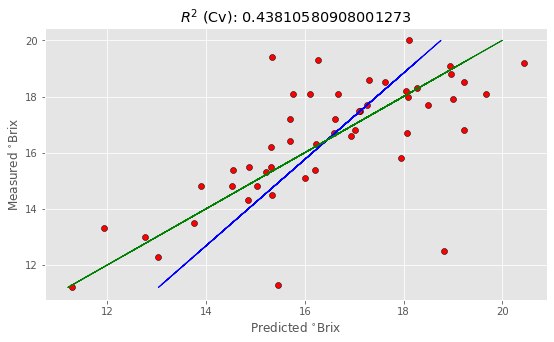

In [ ]:
simple_pls_cv(X1,y,8)

Optimization process

100% completed
Optimised number of components:  15
Wavelengths to be discared 448
Optimised MSEP  1.7765343323189315

R2 calib: 0.898
R2 CV: 0.637
MSE calib: 0.477
MSE CV: 1.693


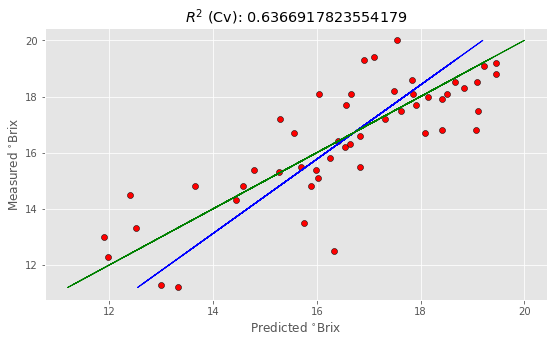

In [ ]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed
Optimised number of components:  10
Wavelengths to be discared 417
Optimised MSEP  1.9073192879566958

R2 calib: 0.850
R2 CV: 0.590
MSE calib: 0.698
MSE CV: 1.910


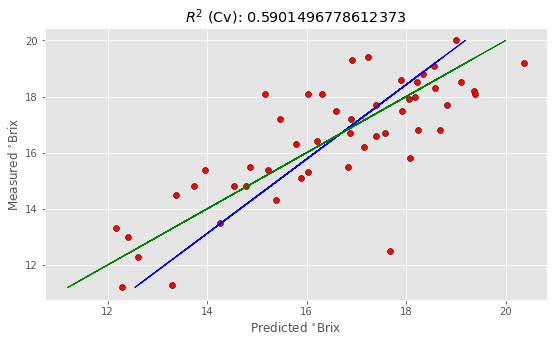

In [ ]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X1, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed
Optimised number of components:  12
Wavelengths to be discared 503
Optimised MSEP  1.3846833128217886

R2 calib: 0.980
R2 CV: 0.708
MSE calib: 0.095
MSE CV: 1.361


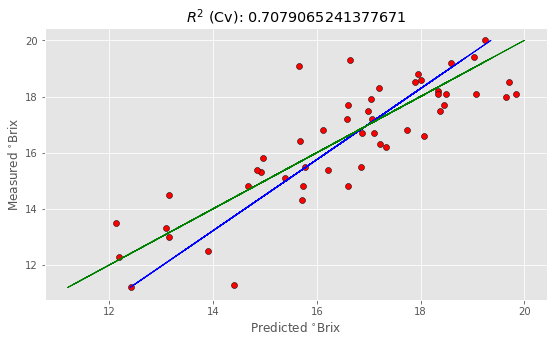

In [ ]:
opt_Xc, ncomp,  wav, sorted_ind = pls_variable_selection(X2, y, 15)
simple_pls_cv(opt_Xc, y, ncomp)

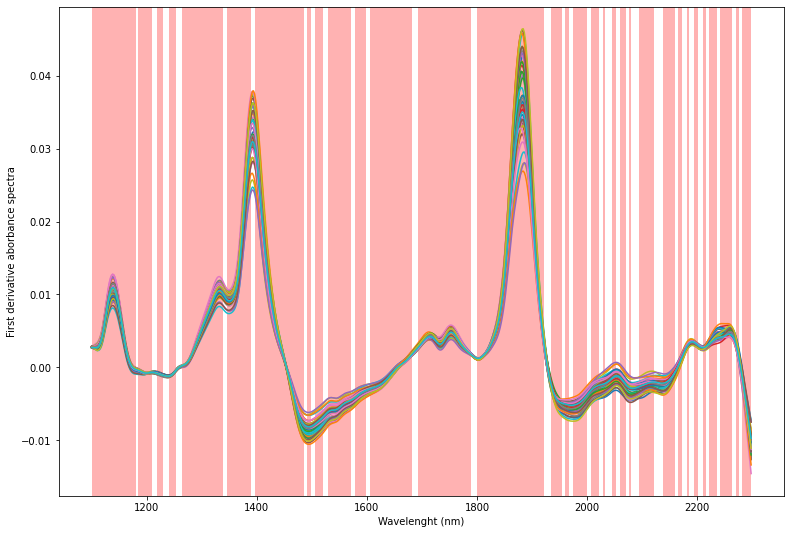

In [ ]:
#Get a boolean array according to the indices that are being discared
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])

import matplotlib.collections as collections

#Plot spectra with supermpose selected bands
fig, ax = plt.subplots(figsize=(13,9))
with plt.style.context(('ggplot')):
  ax.plot(wl, X1.T)
  plt.ylabel('First derivative aborbance spectra')
  plt.xlabel('Wavelenght (nm)')

collection = collections.BrokenBarHCollection.span_where(
    wl, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)

plt.show()